In [1]:
import numpy as np
from math import pi
from scipy.linalg import solve
from scipy.special import jv

# basic periodic scatter information
from novice_stakes.periodic_scatter import Bragg

# complete reflection coefficent calculation modules to check results
from novice_stakes.periodic_scatter import CosineRs, QuadRs

In [2]:
# incident plane wave parameters
theta_inc = 15. * pi / 180.
c = 1500.
fc = 500.

# Sinusoidal paramters
H = 2.
L = 40.
K = 2 * pi / L

# discretize surface
decimation = 8  # integration lengths per acoustic wavelength
dx = c / (8 * fc)
numx = int(np.ceil(L / dx))
dx = L / numx
xper = np.arange(numx) * dx
z_wave = (H / 2) * np.cos(K * xper)
zp_wave = -(H * K / 2) * np.sin(K * xper)

# general considerations for periodic scatter calculations
num_eva = 10
bragg = Bragg(L)
qs = bragg.qvec(theta_inc, num_eva, fc)
a0, an, b0, bn = bragg.bragg_angles(theta_inc, qs, fc)

# source and receiver specifications
xsrc = 0
zsrc = -10
xrcr = 200
zrcr = -20

In [3]:
# Analytic solution of reflection coefficents specific to sinusoidal surface
a_inc = 1j ** qs * jv(qs, -b0 * H / 2)

qdiff = qs[None, :] - qs[:, None]
a_sca = 1j ** qdiff * jv(qdiff, bn[None, :] * H / 2)

# solve system of equation for reflection coefficents
rs_ana = solve(-a_sca, a_inc)
p_rfm_ana = bragg.p_sca(theta_inc, qs, fc, rs_ana, xsrc, zsrc, xrcr, zrcr)
p_rfm_ana

(-0.10821968411364119-0.3637673890258957j)

In [4]:
# check naive notebook implimentation against module results
r_cos = CosineRs(H, L, c=c)
r1_ana = r_cos.rfm_1st(theta_inc, qs, fc)
np.max(np.abs(rs_ana - r1_ana))

0.0

In [7]:
# compaire RFM to integral equation
r_cos = QuadRs(xper, z_wave, zp_wave, c=c)
r_ie1_ana = r_cos.psi_hie_1st(theta_inc, qs, fc)
np.max(np.abs(rs_ana - r_ie1_ana))

/home/nedrichards/miniconda3/lib/python3.8/site-packages/novice_stakes/periodic_scatter/quadrature_rs.py:124: RuntimeWarning: divide by zero encountered in log
  gip_sing = (np.log(np.abs(dx[:, 0]) / L) \
/home/nedrichards/miniconda3/lib/python3.8/site-packages/novice_stakes/periodic_scatter/quadrature_rs.py:160: RuntimeWarning: divide by zero encountered in log
  # compute positive asymptotic sum result
/home/nedrichards/miniconda3/lib/python3.8/site-packages/novice_stakes/periodic_scatter/quadrature_rs.py:160: RuntimeWarning: invalid value encountered in multiply
  # compute positive asymptotic sum result
/home/nedrichards/miniconda3/lib/python3.8/site-packages/novice_stakes/periodic_scatter/quadrature_rs.py:161: RuntimeWarning: invalid value encountered in true_divide
  Gp_total = np.exp(-a0 * dz) * np.log(1 - np.exp(Kper * (1j * dx - dz)))
/home/nedrichards/miniconda3/lib/python3.8/site-packages/novice_stakes/periodic_scatter/quadrature_rs.py:162: RuntimeWarning: divide by zero enc

1.7661189887524185

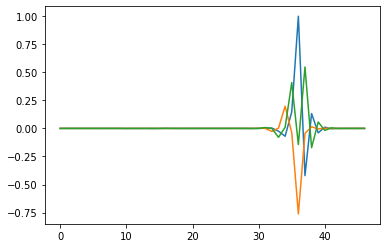

In [9]:
import matplotlib.pyplot as plt
plt.plot(r_ie1_ana.real)
plt.plot(r1_ana.real)
plt.plot(r1_ana.imag)

In [ ]:
r_ie1_ana

In [ ]:
bragg.r_energy(theta_inc, qs, fc, r_ie1_ana)